In [ ]:
"""
Practice the Tensorflow skill based on the official tutorial.


"""

In [31]:
import tensorflow.keras as keras

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load data
x_train, x_test = x_train / 255.0, x_test/ 255.0 #normalize

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [32]:
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #flatten the input
    keras.layers.Dense(128, activation = 'relu'), # Linear, act = relu, output = 128
    keras.layers.Dropout(0.2), #dropout 0.2 
    keras.layers.Dense(10, activation = 'softmax')
    
])
#set the optimizer 

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [35]:
model.fit(x_train, y_train, epochs = 5, verbose = 1)
model.evaluate(x_test, y_test, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.0660 - accuracy: 0.9787
Epoch 2/5
1875/1875 [==============================] - 1s 762us/step - loss: 0.0595 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.0531 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.0484 - accuracy: 0.9834
Epoch 5/5
313/313 [==============================] - 0s 632us/step - loss: 0.0695 - accuracy: 0.9801


[0.06954304128885269, 0.9800999760627747]

## Fashion Mnist

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
train_labels

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

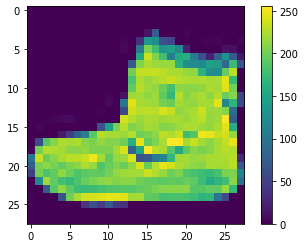

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [51]:
train_images, test_images = train_images/255, test_images/255 # normalize
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

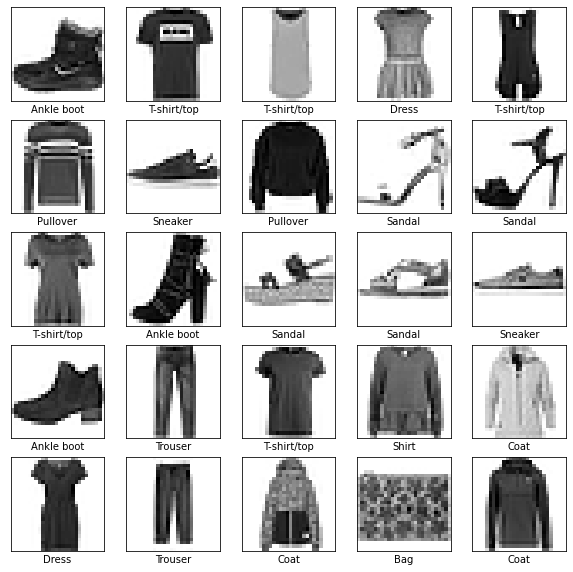

In [53]:
plt.figure(figsize = (10,10)) #set size

for i in range(25):
    plt.subplot(5,5,i+1) #set size
    plt.grid(False)
    plt.xticks([])
    plt.yticks([]) # delete the axis
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

plt.show()

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #transform the output to the prob for the softmax
              metrics=['accuracy'])

In [57]:
model.fit(train_images, train_labels, epochs = 10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6380 - accuracy: 0.7696
Epoch 2/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.5641 - accuracy: 0.7982
Epoch 3/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.5223 - accuracy: 0.8154
Epoch 4/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.4955 - accuracy: 0.8253
Epoch 5/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.4757 - accuracy: 0.8322
Epoch 6/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.4603 - accuracy: 0.8380
Epoch 7/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.4480 - accuracy: 0.8412
Epoch 8/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.4387 - accuracy: 0.8460
Epoch 9/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.4301 - accuracy: 0.8482
Epoch 10/10
1875/1875 [==============================] - 1s 766us/

In [58]:
#combine the before model with Softmax
prob_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])
#make prediction
predictions = prob_model.predict(test_images)
#show the predict
print(predictions[0])
#show the position
print(np.argmax(predictions[0]))
#verify
print(test_labels[0])


[4.4059885e-07 4.9218706e-08 3.5269313e-06 5.0386520e-06 3.7732541e-06
 1.4070755e-01 1.9856678e-05 2.4874392e-01 4.0581208e-03 6.0645771e-01]
9
9


In [90]:
"""
i: the cycle
predictions: predict array
ture label: label array
img: image array

"""

def plot_image(i, predictions, true_label, img):
    
    predictions, true_label, img = predictions[i],true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary) #show the black photo
    predicted_label = np.argmax(predictions) #get the maxiumn hot-one label
    
    #correct label-- blue, wrong label -- red
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
    
    plt.xlabel("{} {:.2f}% ({})".format(
        class_names[predicted_label],
        predictions[predicted_label] *100,
        class_names[true_label]),
        color = color)

def plot_value_array(i, predictions, true_label):
    
    predictions, true_label= predictions[i],true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(len(predictions)), predictions, color = '#777777') # set bar
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

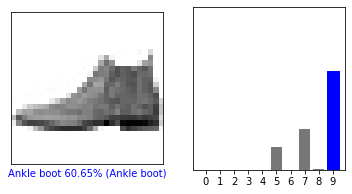

In [91]:
#test plotting result
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt.grid(False)
plot_image(i,predictions, test_labels, test_images )
plt.subplot(1,2,2)
plt.grid(False)
plot_value_array(i,predictions, test_labels )



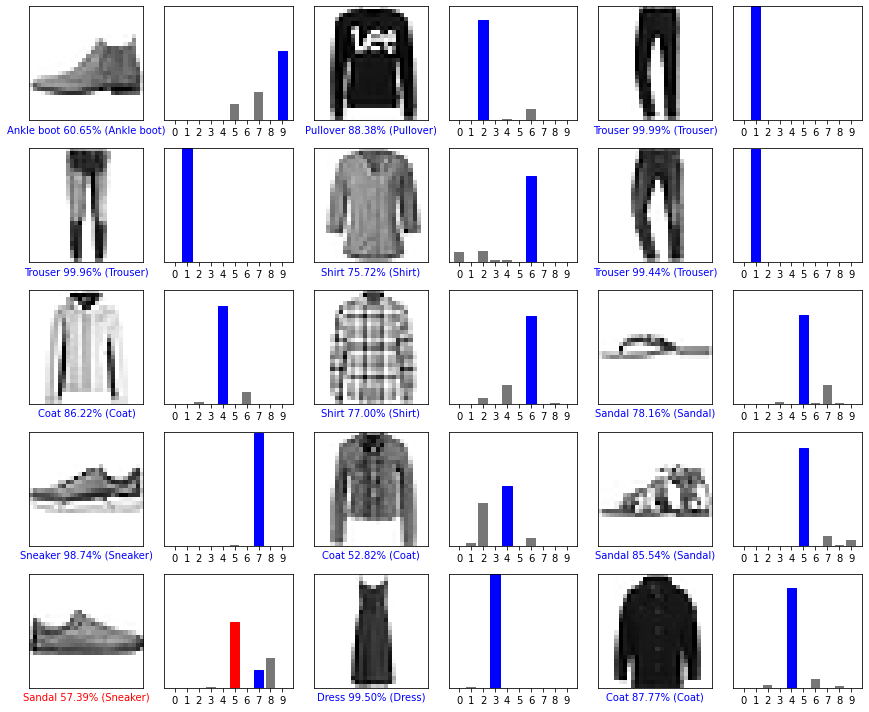

In [98]:
row = 5
coloumn = 3
plt.figure(figsize = (2*2*coloumn,2*row))
for i in range(3*5):
    plt.subplot(row, coloumn*2, 2*i+1)#
    plt.grid(False)
    plot_image(i,predictions, test_labels, test_images )
    plt.subplot(row, coloumn*2, 2*i+2)#
    plt.grid(False)
    plot_value_array(i,predictions, test_labels )

plt.tight_layout()
plt.show()
    
    
    

In [101]:
image_test = test_images[0]
print(image_test.shape) #show the size of the image

(28, 28)


In [102]:
image_test = np.expand_dims(image_test, 0)
image_test.shape #expand the dim to fit the model

(1, 28, 28)

In [103]:
pre_single = prob_model.predict(image_test)
pre_single # the predicted outcome of the single image

array([[4.4059780e-07, 4.9218631e-08, 3.5269327e-06, 5.0386443e-06,
        3.7732520e-06, 1.4070745e-01, 1.9856630e-05, 2.4874379e-01,
        4.0581198e-03, 6.0645795e-01]], dtype=float32)

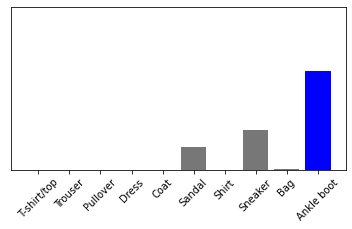

In [117]:
plt.figure(figsize = (6,3))
plot_value_array(0,pre_single,test_labels)
_ = plt.xticks(range(10), class_names, rotation =45) #rotate the x axis label